In [ ]:
import pandas as pd 
import numpy as np
import os,csv
import matplotlib.pyplot as plt
from sklearn import linear_model, preprocessing, cross_validation, svm
import tensorflow as tf
from sklearn.grid_search import GridSearchCV
import csv
from sklearn.svm import SVC
from PIL import Image

In [2]:
new_dfs=pd.read_csv('/Users/user/Research/new_dfs.csv', index_col=0)

In [3]:
CPU_table_KID11=pd.read_csv('/Users/user/Research/CPU_table_KID11.csv', index_col=0)

In [4]:
sess = tf.InteractiveSession() # Prepare the sesstion

nInput = 6
nOutput = 3

def weight_variable(shape):
    initial = tf.truncated_normal(shape,stddev=0.1)
    return tf.Variable(initial)
def bias_variable(shape):
    initial = tf.constant(0.1,shape=shape)
    return tf.Variable(initial)

In [5]:
x = tf.placeholder(tf.float32, shape=[None, nInput], name = "input")
#x = tf.placeholder(tf.float32, shape=[nInput], name = "input")
y_ = tf.placeholder(tf.float32, shape=[None, nOutput], name = "output") 
#y_ = tf.placeholder(tf.float32, shape=[nOutput], name = "output") 

w = tf.Variable(tf.zeros([nInput, nOutput]))  #weight
b = tf.Variable(tf.zeros([nOutput])) #bias
x

<tf.Tensor 'input:0' shape=(?, 6) dtype=float32>

In [6]:
#INPUT
CORES=new_dfs.iloc[:,0:6]

INP_cores=[]

for i in range(320):
    tmp=np.array(CORES.iloc[i])
    INP_cores.append(tmp)
    
input_data=np.array(INP_cores)
input_data[0]

array([ 7, 11,  3, 10,  9, 23])

In [7]:
#OUTPUT

EX_tempera=new_dfs.iloc[:,9:12]
#output_data=np.zeros[(320,3)]
OUP_temp=[]

for i in range(320):
        tmp=np.array(EX_tempera.iloc[i])
        OUP_temp.append(tmp)
        
output_data=np.array(OUP_temp)

new_dfs

,KID1,KID3,KID5,KID7,KID9,KID11,CRAC_set,CRAC_out,time,temp1,temp2,temp3
1,7,11,3,10,9,23,80,65,100s,36.2,34.9,35.1
2,11,22,10,19,21,4,80,65,NaN,36.4,34.9,35.3
3,20,24,4,14,0,1,80,65,NaN,35.5,34.9,34.9
4,22,3,16,17,19,5,80,65,NaN,35.4,34.7,34.8
5,4,22,14,11,8,7,80,65,NaN,35.7,34.8,35.2
6,24,10,9,7,12,1,80,65,NaN,35.1,34.3,35.0
7,16,22,8,22,19,23,80,65,NaN,35.7,34.9,34.9
8,7,0,15,18,23,10,80,65,NaN,35.6,34.1,34.9
9,21,17,20,13,4,18,80,65,NaN,35.2,34.7,35.1
10,1,4,10,23,23,23,80,65,NaN,35.4,35.1,35.2


In [8]:
#非線形回帰モデル
# 30分類器 full=connection

#第１層
W_fc1 = weight_variable([nInput,30])
b_fc1 = bias_variable([30])
h_fc1 = tf.nn.relu(tf.matmul(x,W_fc1) + b_fc1) #発火の定義，発火関数はrelu

#第２層
W_fc2 = weight_variable([30,10])
b_fc2 = bias_variable([10])
h_fc2 = tf.nn.relu(tf.matmul(h_fc1,W_fc2) + b_fc2)

keep_prob = tf.placeholder(tf.float32)  #Need to check !! Sotaさんに聞いてみる！

#最終層（OutPut）
W_fc3 = weight_variable([10,3])
b_fc3 = bias_variable([3])
y = tf.nn.relu(tf.matmul(h_fc2,W_fc3) + b_fc3)

#ソフトマックス関数(分類)は省いている
#y = tf.nn.sigmoid(tf.matmul(x,w) + b)

In [9]:
#y_ = training data , y = predection data 
cross_entropy = tf.reduce_mean(tf.reduce_sum(tf.square(y - y_)))
#train_step = tf.train.GradientDescentOptimizer(0.01).minimize(cross_entropy)
train_step = tf.train.AdamOptimizer(1e-4).minimize(cross_entropy)
sess = tf.InteractiveSession()
sess.run(tf.global_variables_initializer())

In [10]:
batch_size = 8 # バッチサイズ  
num_data = 256
losses=[]
print(num_data)
for i in range(10000):
    sff_idx = np.random.permutation(num_data)  # num_data をランダムに変化させている（実際には指す順番を変化させている）
    for idx in range(0, num_data, batch_size):
        Input_batch = input_data[sff_idx[idx: idx + batch_size if idx + batch_size < num_data else num_data]]
        Output_batch = output_data[sff_idx[idx: idx + batch_size if idx + batch_size < num_data else num_data]]
     #   train_step.run(feed_dict={x:Input_batch, y_:Output_batch})
        train_step.run(feed_dict={x:Input_batch, y_:Output_batch, keep_prob:1.0})
    if i%200 == 0:
      #  loss = sess.run(cross_entropy,feed_dict={x:Input, y_:Output})
        loss = sess.run(cross_entropy,feed_dict={x:input_data, y_:output_data, keep_prob:1.0})
        print("set %d"%(i))
        print("loss ={} ".format(loss))
        losses.append(loss)
print('end')

256
set 0
loss =1175229.75 
set 200
loss =53155.31640625 
set 400
loss =35561.9609375 
set 600
loss =18479.76171875 
set 800
loss =7473.3740234375 
set 1000
loss =1916.143798828125 
set 1200
loss =424.70989990234375 
set 1400
loss =140.3328399658203 
set 1600
loss =112.85735321044922 
set 1800
loss =106.46429443359375 
set 2000
loss =131.8784942626953 
set 2200
loss =104.01761627197266 
set 2400
loss =101.46111297607422 
set 2600
loss =103.25569152832031 
set 2800
loss =97.87844848632812 
set 3000
loss =97.02067565917969 
set 3200
loss =97.18372344970703 
set 3400
loss =100.05340576171875 
set 3600
loss =113.86167907714844 
set 3800
loss =106.73152923583984 
set 4000
loss =96.37201690673828 
set 4200
loss =96.08331298828125 
set 4400
loss =92.44468688964844 
set 4600
loss =92.29401397705078 
set 4800
loss =91.17979431152344 
set 5000
loss =92.61511993408203 
set 5200
loss =90.5168685913086 
set 5400
loss =89.61540222167969 
set 5600
loss =94.337158203125 
set 5800
loss =110.60435485839

In [11]:
#予測値(y)の算出
NN_predict=sess.run(y, feed_dict={x:input_data, y_: output_data})

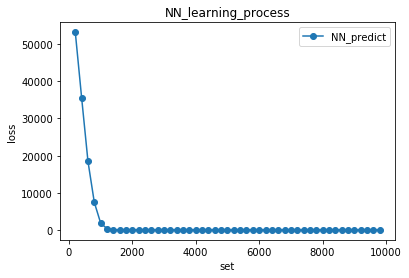

In [12]:
Set=[]
for i in range(200, 10000, 200):
    Set.append(i)

plt.plot(Set, losses[1:], linestyle="solid", marker="o", label="NN_predict")
plt.xlabel("set") 
plt.ylabel("loss")
plt.title('NN_learning_process')
plt.legend(loc ="upper right")
plt.show()

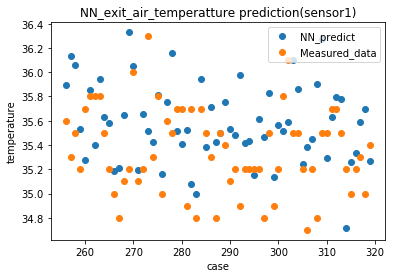

RMS_NN: 0.454176699357


In [13]:
A=[]
B=[]
Teacher_data=[]
for i in range(256,320):
    A.append(i)

for i in range(256,320):
    B.append(NN_predict[i][0])
    Teacher_data.append(output_data[i][0])
    
plt.plot(A, B, "o", label="NN_predict")
plt.plot(A, Teacher_data, "o", label="Measured_data")
plt.xlabel("case") 
plt.ylabel("temperature")
plt.title('NN_exit_air_temperatture prediction(sensor1)')
#plt.xlim(-10, 350)
#plt.ylim(34.0, 36.5)
plt.legend(loc ="upper right")
plt.show()

RMS_NN=np.sqrt(np.mean((np.array(B)-np.array(Teacher_data))**2))
print("RMS_NN:", RMS_NN)

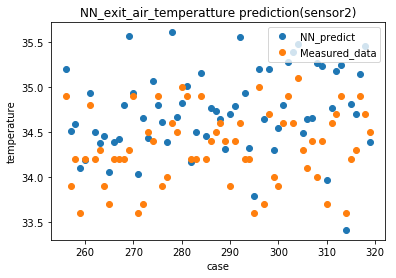

RMS_NN: 0.508543931902


In [14]:
B=[]
Teacher_data=[]
for i in range(256,320):
    B.append(NN_predict[i][1])
    Teacher_data.append(output_data[i][1])
    
plt.plot(A, B, "o", label="NN_predict")
plt.plot(A, Teacher_data, "o", label="Measured_data")
plt.xlabel("case") 
plt.ylabel("temperature")
plt.title('NN_exit_air_temperatture prediction(sensor2)')
#plt.xlim(-10, 350)
#plt.ylim(33.0, 36.5)
plt.legend(loc ="upper right")
plt.show()

RMS_NN=np.sqrt(np.mean((np.array(B)-np.array(Teacher_data))**2))
print("RMS_NN:", RMS_NN)

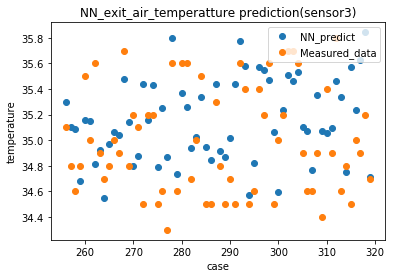

RMS_NN: 0.393521955844


In [20]:
B=[]
Teacher_data=[]
for i in range(256,320):
    B.append(NN_predict[i][2])
    Teacher_data.append(output_data[i][2])
    
plt.plot(A, B, "o", label="NN_predict")
plt.plot(A, Teacher_data, "o", label="Measured_data")
plt.xlabel("case") 
plt.ylabel("temperature")
plt.title('NN_exit_air_temperatture prediction(sensor3)')
#plt.xlim(-10, 350)
#plt.ylim(33.0, 36.5)
plt.legend(loc ="upper right")
plt.show()

RMS_NN=np.sqrt(np.mean((np.array(B)-np.array(Teacher_data))**2))
print("RMS_NN:", RMS_NN)

# including FAN